In [11]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("asm_full_opt")
from phase_mask import PhaseMask
from asm_prop import ASMPropagator
import config

UM = 1E-6

In [2]:
def plot_phase(phi, X, Y, title):
    """
    Plot phase with +x right, +y up, axes in microns.
    """
    x_um = X[:, 0].detach().cpu().numpy() * 1e6
    y_um = Y[0, :].detach().cpu().numpy() * 1e6

    plt.figure(figsize=(5, 5))
    plt.imshow(
        phi.detach().cpu().numpy().T,
        origin="lower",
        extent=[x_um.min(), x_um.max(), y_um.min(), y_um.max()],
        cmap="twilight"
    )
    plt.colorbar(label="Phase (rad)")
    plt.xlabel("x (µm)")
    plt.ylabel("y (µm)")
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    plt.show()


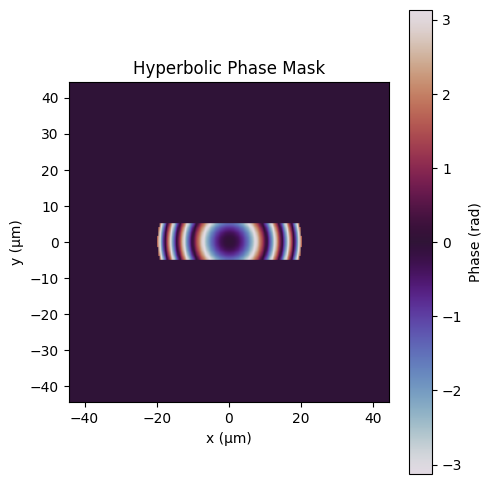

In [3]:
asm = ASMPropagator(config)

phase_hyper = PhaseMask(
    config,
    init="hyperbolic",
    X=asm.X,
    Y=asm.Y,
    wrap_phase=True,
    test_orientation=True,
)

phi_hyper = phase_hyper()
# phi_hyper[0:10, 0:20] = 1

plot_phase(phi_hyper, phase_hyper.X, phase_hyper.Y, "Hyperbolic Phase Mask")

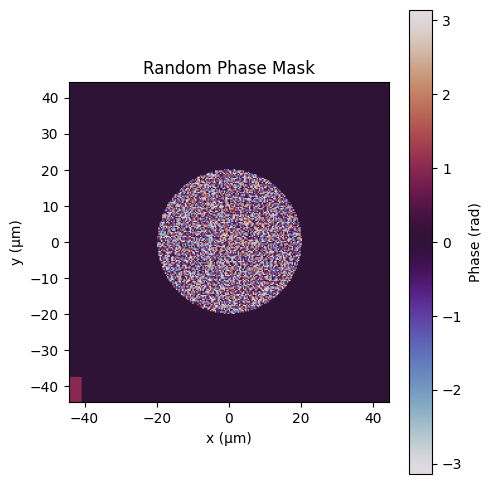

In [4]:
phase_rand = PhaseMask(
    config,
    init="random",
    wrap_phase=True,
    test_orientation=False,
)

phi_rand = phase_rand()
phi_rand[0, 0:10, 0:20] = 1

plot_phase(phi_rand, phase_rand.X, phase_rand.Y, "Random Phase Mask")

In [5]:
print(phi_rand.shape)

torch.Size([1, 255, 255])


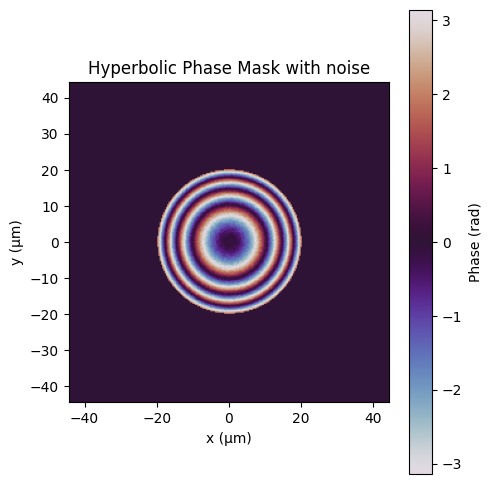

In [6]:
phase_hyper_noise = PhaseMask(
    config,
    noise_std=0.1,
    init="hyperbolic",
    wrap_phase=True,
    test_orientation=False,
)

phi_hyper_noise = phase_hyper_noise()
# phi_hyper_noise[0:10, 0:20] = 1

plot_phase(phi_hyper_noise, phase_hyper_noise.X, phase_hyper_noise.Y, "Hyperbolic Phase Mask with noise")

In [7]:
def plot_phase_stack(phi, X, Y, title, max_plots=16):
    """
    Plot a stack of phase masks (K, N, N) as a grid.
    """
    phi = phi.detach().cpu()
    K, N, _ = phi.shape

    K_plot = min(K, max_plots)
    grid_size = int(math.ceil(math.sqrt(K_plot)))

    x_um = X[:, 0].detach().cpu().numpy() * 1e6
    y_um = Y[0, :].detach().cpu().numpy() * 1e6

    fig, axes = plt.subplots(
        grid_size,
        grid_size,
        figsize=(2 * grid_size, 2 * grid_size),
        constrained_layout=True,
    )

    axes = np.atleast_2d(axes)

    for k in range(grid_size * grid_size):
        ax = axes[k // grid_size, k % grid_size]

        if k < K_plot:
            im = ax.imshow(
                phi[k].numpy().T,
                origin="lower",
                extent=[x_um.min(), x_um.max(), y_um.min(), y_um.max()],
                cmap="twilight",
            )
            ax.set_title(f"Mask {k}")
            ax.set_aspect("equal")
        else:
            ax.axis("off")

        ax.set_xticks([])
        ax.set_yticks([])

    cbar = fig.colorbar(
        im,
        ax=axes,
        location="right",
        shrink=0.85,
        label="Phase (rad)",
    )

    fig.suptitle(title, fontsize=14)
    plt.show()


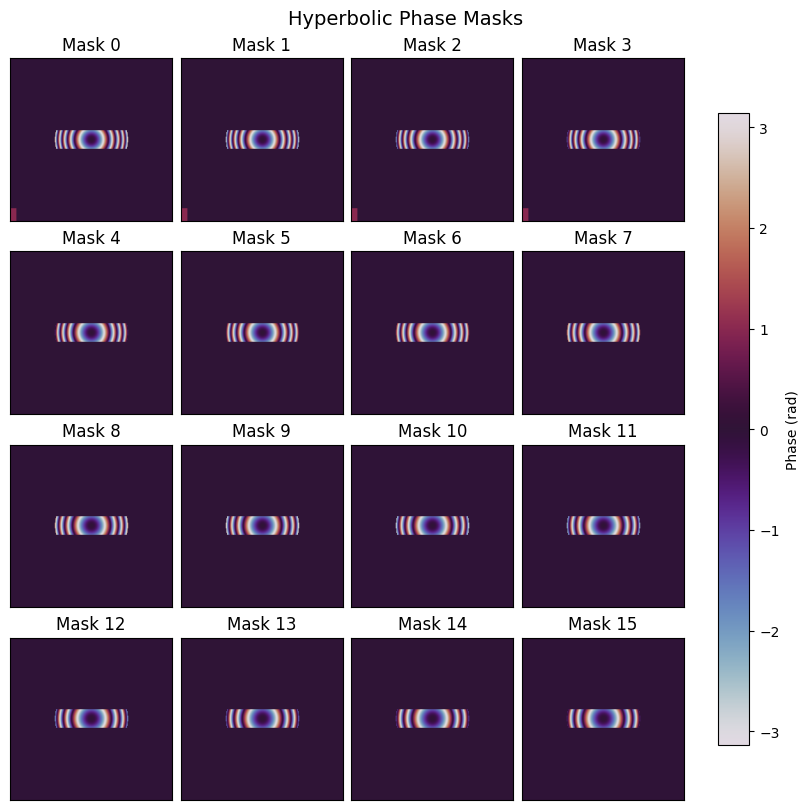

In [8]:
phase_hyper = PhaseMask(
    config,
    num_masks=16,
    init="hyperbolic",
    defocus_max=20*UM,
    X=asm.X,
    Y=asm.Y,
    wrap_phase=True,
    test_orientation=True,
)

phi_hyper = phase_hyper()
phi_hyper[0:4, 0:10, 0:20] = 1

plot_phase_stack(phi_hyper, phase_hyper.X, phase_hyper.Y, "Hyperbolic Phase Masks")

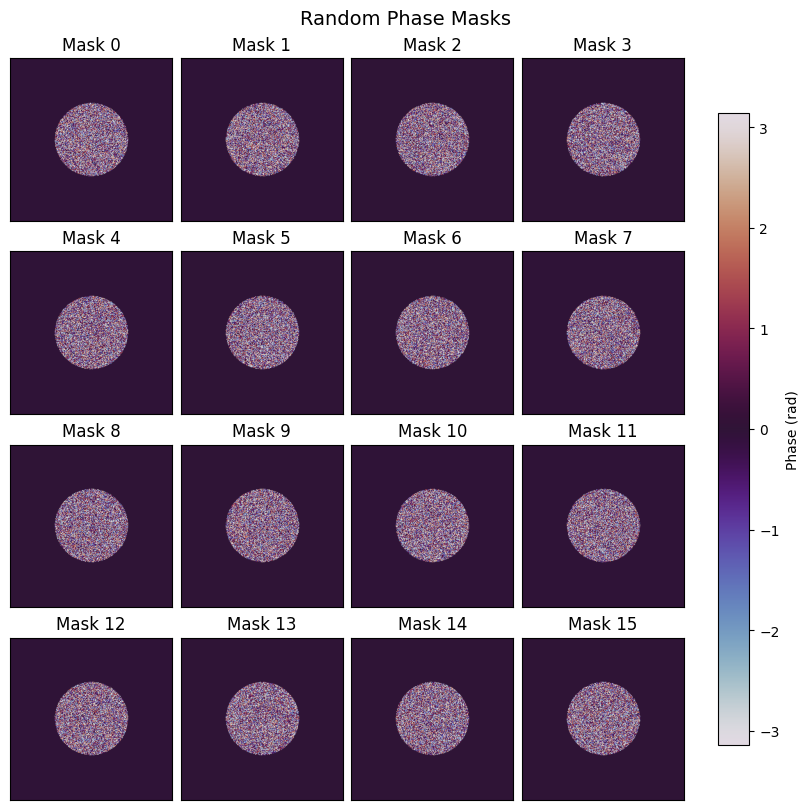

In [9]:
phase_rand = PhaseMask(
    config,
    num_masks=16,
    init="random",
    wrap_phase=True,
    test_orientation=False,
)

phi_rand = phase_rand()
# phi_rand[0, 0:10, 0:20] = 1

plot_phase_stack(phi_rand, phase_rand.X, phase_rand.Y, "Random Phase Masks")

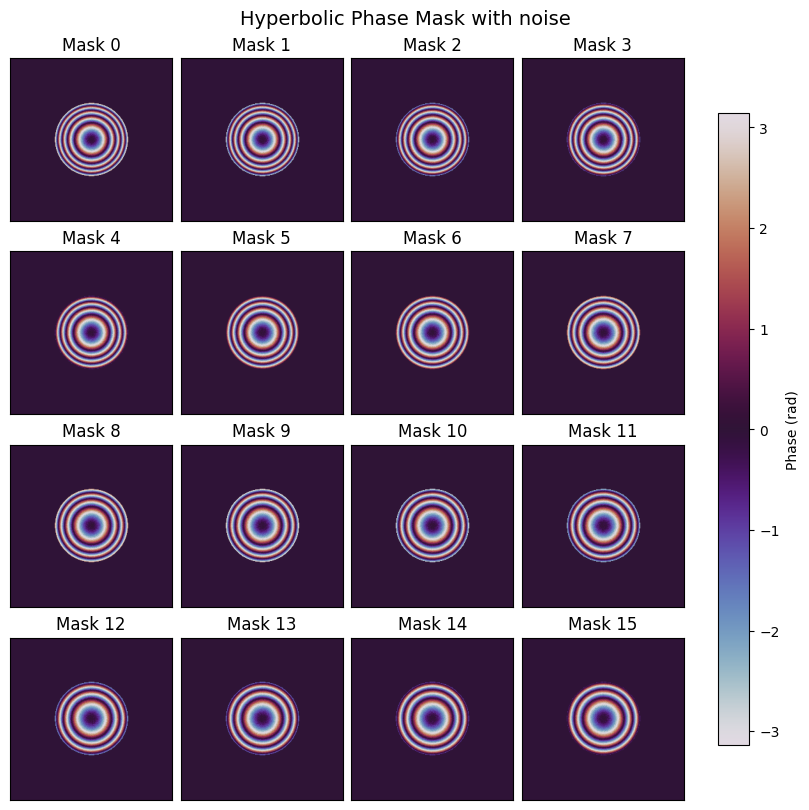

In [10]:
phase_hyper_noise = PhaseMask(
    config,
    num_masks=16,
    defocus_max = 20*UM,
    noise_std=0.1,
    init="hyperbolic",
    wrap_phase=True,
    test_orientation=False,
)

phi_hyper_noise = phase_hyper_noise()
# phi_hyper_noise[0:10, 0:20] = 1

plot_phase_stack(phi_hyper_noise, phase_hyper_noise.X, phase_hyper_noise.Y, "Hyperbolic Phase Mask with noise")